## Data Visualisation

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Utils import display, save
from random import randint, shuffle
import keras
from keras.preprocessing.image import ImageDataGenerator

In [20]:
def getAllFiles(src):
    allFiles = []
    for root, _, files in os.walk(src):
        for file in files:
            if '.png' in file:
                allFiles.append(file)
    
    return allFiles

In [21]:
def displayRandomImgs():
    subfolders = os.listdir('../imgs/train')
    src = os.path.join('../imgs/train', subfolders[randint(0, len(subfolders))])
    allFiles = getAllFiles(src)
    shuffle(allFiles)
    imgs = [cv2.imread(os.path.join(src, allFiles[i])) for i in range(10)]
    print(np.unique(imgs[0]))
    print('Class Label: {}'.format(src.split('/')[-1]))
    display(imgs, multiple=True, rows=3, cols=3)

[  0 255]
Class Label: 0


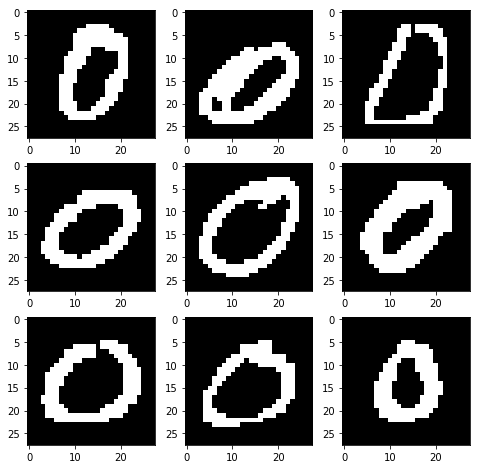

In [22]:
displayRandomImgs()

In [54]:
def getStats(folder):
    if folder == 'train':
        folder = '../imgs/train'
    elif folder == 'validation':
        folder = '../imgs/validation'
    elif folder == 'test':
        folder = '../imgs/test'
        
    print('[INFO] Total No. of Classes {}'.format(len(os.listdir(folder))))
    print(os.listdir(folder))
    totalNum = len(getAllFiles(folder))
    print('[INFO] Total No. of Files: {}\n'.format(totalNum))
    
    lenFiles = {}
    for subfolder in os.listdir(folder):
        src = os.path.join(folder, subfolder)
        numFiles = len(getAllFiles(src))
        lenFiles[subfolder] = numFiles
        print('[INFO] Class {} has {} files'.format(subfolder, numFiles))
        
    return lenFiles

[INFO] Total No. of Classes 53
['$', ')', 'L', 'H', 'N', '2', 'I', 'D', 'b', '1', 'f', 'J', 'E', 'Y', 'h', 'e', '7', '@', 'C', 'r', '#', 'F', 'q', 'X', 'P', '(', '0', 'A', '6', 'O', 'W', 'U', 'T', '9', 'M', 'R', 'V', 'G', 'B', '5', 't', '3', '8', 'a', '4', 'slash', 'Z', 'Q', 'n', 'K', 'g', 'd', 'S']
[INFO] Total No. of Files: 12163

[INFO] Class $ has 240 files
[INFO] Class ) has 32 files
[INFO] Class L has 245 files
[INFO] Class H has 245 files
[INFO] Class N has 245 files
[INFO] Class 2 has 245 files
[INFO] Class I has 245 files
[INFO] Class D has 245 files
[INFO] Class b has 245 files
[INFO] Class 1 has 245 files
[INFO] Class f has 245 files
[INFO] Class J has 251 files
[INFO] Class E has 245 files
[INFO] Class Y has 251 files
[INFO] Class h has 245 files
[INFO] Class e has 240 files
[INFO] Class 7 has 240 files
[INFO] Class @ has 240 files
[INFO] Class C has 240 files
[INFO] Class r has 240 files
[INFO] Class # has 240 files
[INFO] Class F has 240 files
[INFO] Class q has 240 files

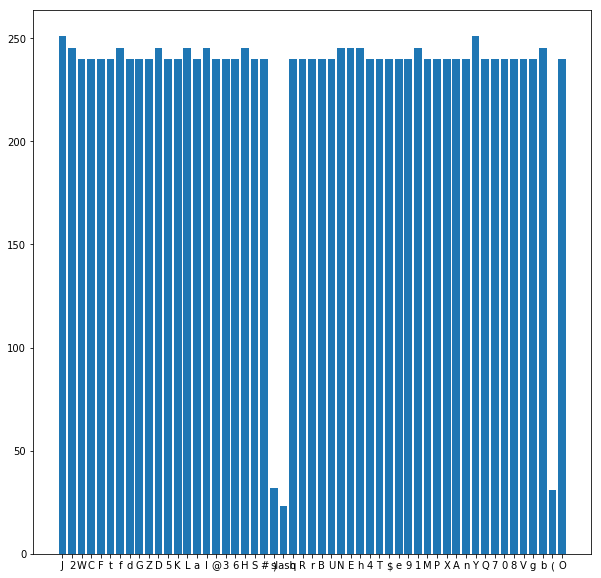

In [55]:
lenFiles = getStats('validation')
plt.figure(figsize=(10,10))
plt.bar(range(len(lenFiles)), list(lenFiles.values()), align='center')
plt.xticks(range(len(lenFiles)), list(lenFiles.keys()))
plt.show()

In [56]:
train_datagen = ImageDataGenerator(rotation_range=10, 
                                   rescale=1./255, 
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   validation_split=0.1)

In [57]:
train_generator = train_datagen.flow_from_directory('../imgs/train', target_size = (28,28),  
                                                    batch_size=1, color_mode='grayscale',
                                                    class_mode='categorical', subset='training',
                                                    shuffle=True)

Found 98581 images belonging to 53 classes.


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

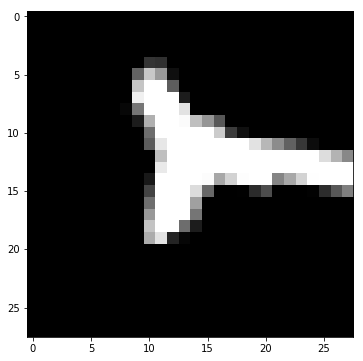

In [60]:
img = train_generator.next()[0][0]
print(img)
display(img)